### Required Methods

In [1]:
"""
    File name: Plot_Utils.ipynb
    Author: Amin Abyaneh
    Email: aminabyaneh@gmail.com
    Date created: 25/04/2021
    Python Version: 3.8
    Description: Extracting the execution data by plots.
"""

# ========================================================================
# Copyright 2021, The CFL Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# You may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ========================================================================


import os, sys
import pickle
from typing import List

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from logging_settings import logger

cm = 0.393701

In [3]:
def set_plot_styles(title: str, x_label: str, y_label: str, save_file_name: str,
                    legend_location: str = 'upper right', legend_labels: str = None,
                    title_size: int = 20, labels_size: int = 15, ticks_size: int = 15,
                    legend_size: int = 10, xticks_rotation: int = 45):
    """
    Set the plot styles ranging from title, labels and legends all the way to

    Args:
        title (str): The plot title.
        x_label (str): Label of the x axis.
        y_label (str): Label of the y axis.

        save_file_name (str): Where and in what name do you like to save the figure.
        legend_location (str): Optimize the legends locations. Defaults to 'upper right'.
        legend_labels (str): If label is available, change this from None to the label itself.
        Defaults to None.

        title_size (int): Size of the figures title. Defaults to 20.
        labels_size (int): Size of the labels. Defaults to 15.
        ticks_size (int): Ticks size. Defaults to 15.
        legend_size (int): Size of legends. Defaults to 10.
        xticks_rotation (int): The rotation of X-axis labels. Defaults to 45.
    """

    if legend_labels is None:
        plt.legend(ncol=1, loc=legend_location, fontsize=legend_size)
    else:
        plt.legend(labels=legend_labels, loc=legend_location, fontsize=legend_size)

    plt.title(title, fontsize=title_size)
    plt.xlabel(x_label, fontsize=labels_size)
    plt.ylabel(y_label, fontsize=labels_size)

    plt.xticks(fontsize=ticks_size, rotation=xticks_rotation)
    plt.yticks(fontsize=ticks_size)

    plt.savefig(save_file_name, bbox_inches='tight')
    plt.show()

### Unbalanced Interventions


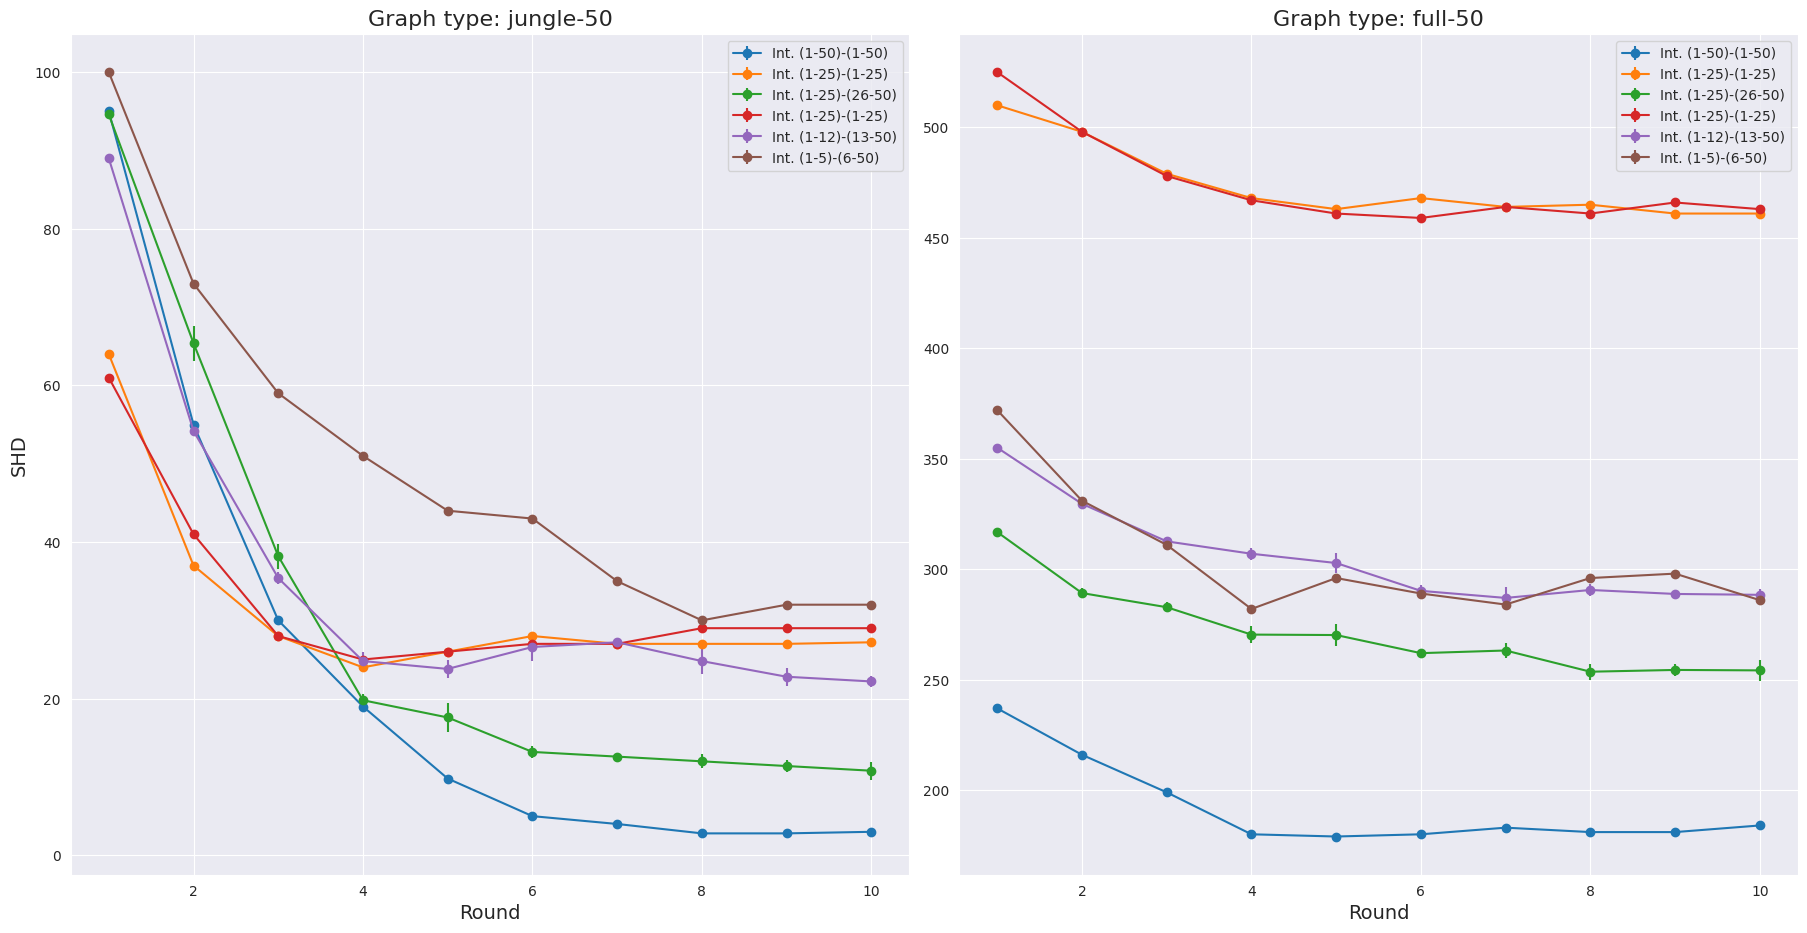

In [19]:
"""
We get a folder structure like this after running the experiments.

GraphAsym2-chain-50/
"""

# Experiments
num_experiments = 6
repeat_count = 5
num_of_rounds = 10

# Graphs
graph_types = ["jungle", "full"] # "jungle", "full",
num_vars = 50

# Dataset size
num_clients = 2
intervention_models = ["(1-50)-(1-50)", "(1-25)-(1-25)", "(1-25)-(26-50)", "(1-25)-(1-25)", "(1-12)-(13-50)", 
                       "(1-5)-(6-50)"]

# Miscellaneous
plot_metric = "SHD"
std_exageration = 1
parent_folder_name = "int_asym_2c"


def retrieve_client_info(stored_results_dict, metric=plot_metric) -> np.ndarray:
    return np.asarray([client_dict[metric] for client_dict in stored_results_dict['priors']])

# A list for rounds
rounds = np.arange(start=1, stop=num_of_rounds + 1, step=1)

n_row = 1
n_col = len(graph_types)

sns.set_style('darkgrid')

fig, axs = plt.subplots(n_row, n_col, figsize=(18, 9), dpi=100, sharex='all')
fig.tight_layout(h_pad=2, w_pad=0.5)

for idx, graph_type in enumerate(graph_types):
    
    ax_col = idx % 4
    axs[ax_col].set_title(f'Graph type: {graph_type}-{num_vars}', fontsize=16)
    folder_name = f'GraphAsym{num_clients}-{graph_type}-{num_vars}'

    for experiment_id in range(num_experiments):
        metrics = list()
        for rep_idx in range(repeat_count):
            # Mean on all the repititions

            data_file_name = f'results_{experiment_id}_{rep_idx}.pickle'
            load_dir = os.path.join(os.pardir, 'data', parent_folder_name, folder_name, data_file_name)

            with open(load_dir, 'rb') as handle:
                results_dict = pickle.load(handle)

            metrics.append(retrieve_client_info(results_dict))

        metrics_avg = np.mean(np.asarray(metrics), axis=0)
        metrics_std = np.std(np.asarray(metrics), axis=0)

        lab = f'Int. {intervention_models[experiment_id]}'


        axs[ax_col].errorbar(rounds, metrics_avg, std_exageration * metrics_std, label=lab,
                                     linestyle='solid', marker='o')
        axs[ax_col].legend(loc='upper right')

    for r in range(n_row):
        axs[0].set_ylabel(plot_metric, fontsize=14)


    for c in range(n_col):
        axs[c].set_xlabel('Round', fontsize=14)

plt.savefig(f'int-asym-c{num_clients}-v{num_vars}-g{graph_types}.png', bbox_inches='tight')
plt.show()


### Structured graphs multi-client setting


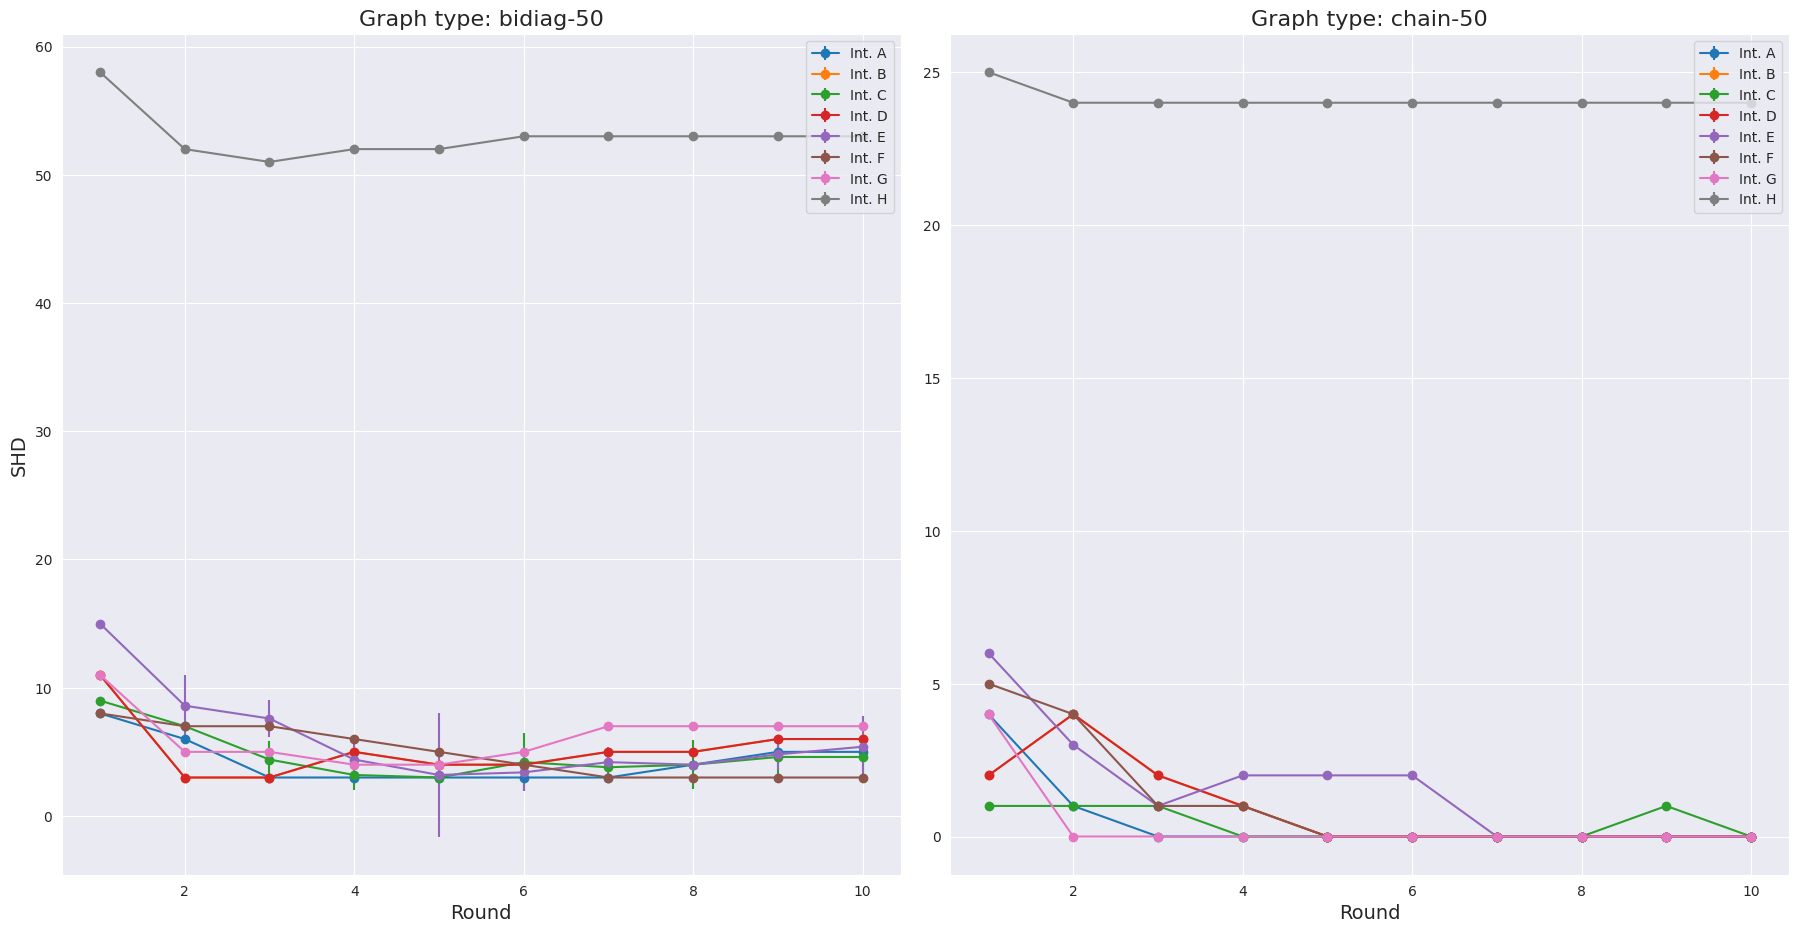

In [13]:
"""
We get a folder structure like this after running the experiments.

GraphAsym-chain-50/
"""

# Experiments
num_experiments = 8
repeat_count = 5
num_of_rounds = 10

# Graphs
graph_types = ["bidiag", "chain"]
num_vars = 50

# Dataset size
num_clients = 5
intervention_models = ["A", "B", "C", "D", "E", "F", "G", "H"]

# Miscellaneous
plot_metric = "SHD"
std_exageration = 3
parent_folder_name = "int_asym_str"

def retrieve_client_info(stored_results_dict, metric=plot_metric) -> np.ndarray:
    return np.asarray([client_dict[metric] for client_dict in stored_results_dict['priors']])

rounds = np.arange(start=1, stop=num_of_rounds + 1, step=1)

n_row = 1
n_col = len(graph_types)

sns.set_style('darkgrid')

fig, axs = plt.subplots(n_row, n_col, figsize=(18, 9), dpi=100)
fig.tight_layout(h_pad=2, w_pad=0.5)

for idx, graph_type in enumerate(graph_types):
    
    ax_col = idx % 4
    axs[ax_col].set_title(f'Graph type: {graph_type}-{num_vars}', fontsize=16)
    folder_name = f'GraphAsym-{graph_type}-{num_vars}'

    for experiment_id in range(num_experiments):
        metrics = list()

        for rep_idx in range(repeat_count):
            data_file_name = f'results_{experiment_id}_{rep_idx}.pickle'
            load_dir = os.path.join(os.pardir, 'data', parent_folder_name, folder_name, data_file_name)

            with open(load_dir, 'rb') as handle:
                results_dict = pickle.load(handle)

            metrics.append(retrieve_client_info(results_dict))

        metrics_avg = np.mean(np.asarray(metrics), axis=0)
        metrics_std = np.std(np.asarray(metrics), axis=0)

        lab = f'Int. {intervention_models[experiment_id]}'


        axs[ax_col].errorbar(rounds, metrics_avg, std_exageration * metrics_std, label=lab,
                                     linestyle='solid', marker='o')
        axs[ax_col].legend(loc='upper right')

    for r in range(n_row):
        axs[0].set_ylabel(plot_metric, fontsize=14)


    for c in range(n_col):
        axs[c].set_xlabel('Round', fontsize=14)

plt.savefig(f'int-asym-c{num_clients}-v{num_vars}-g{graph_types}.png', bbox_inches='tight')
plt.show()


### Random graphs multi-client setting


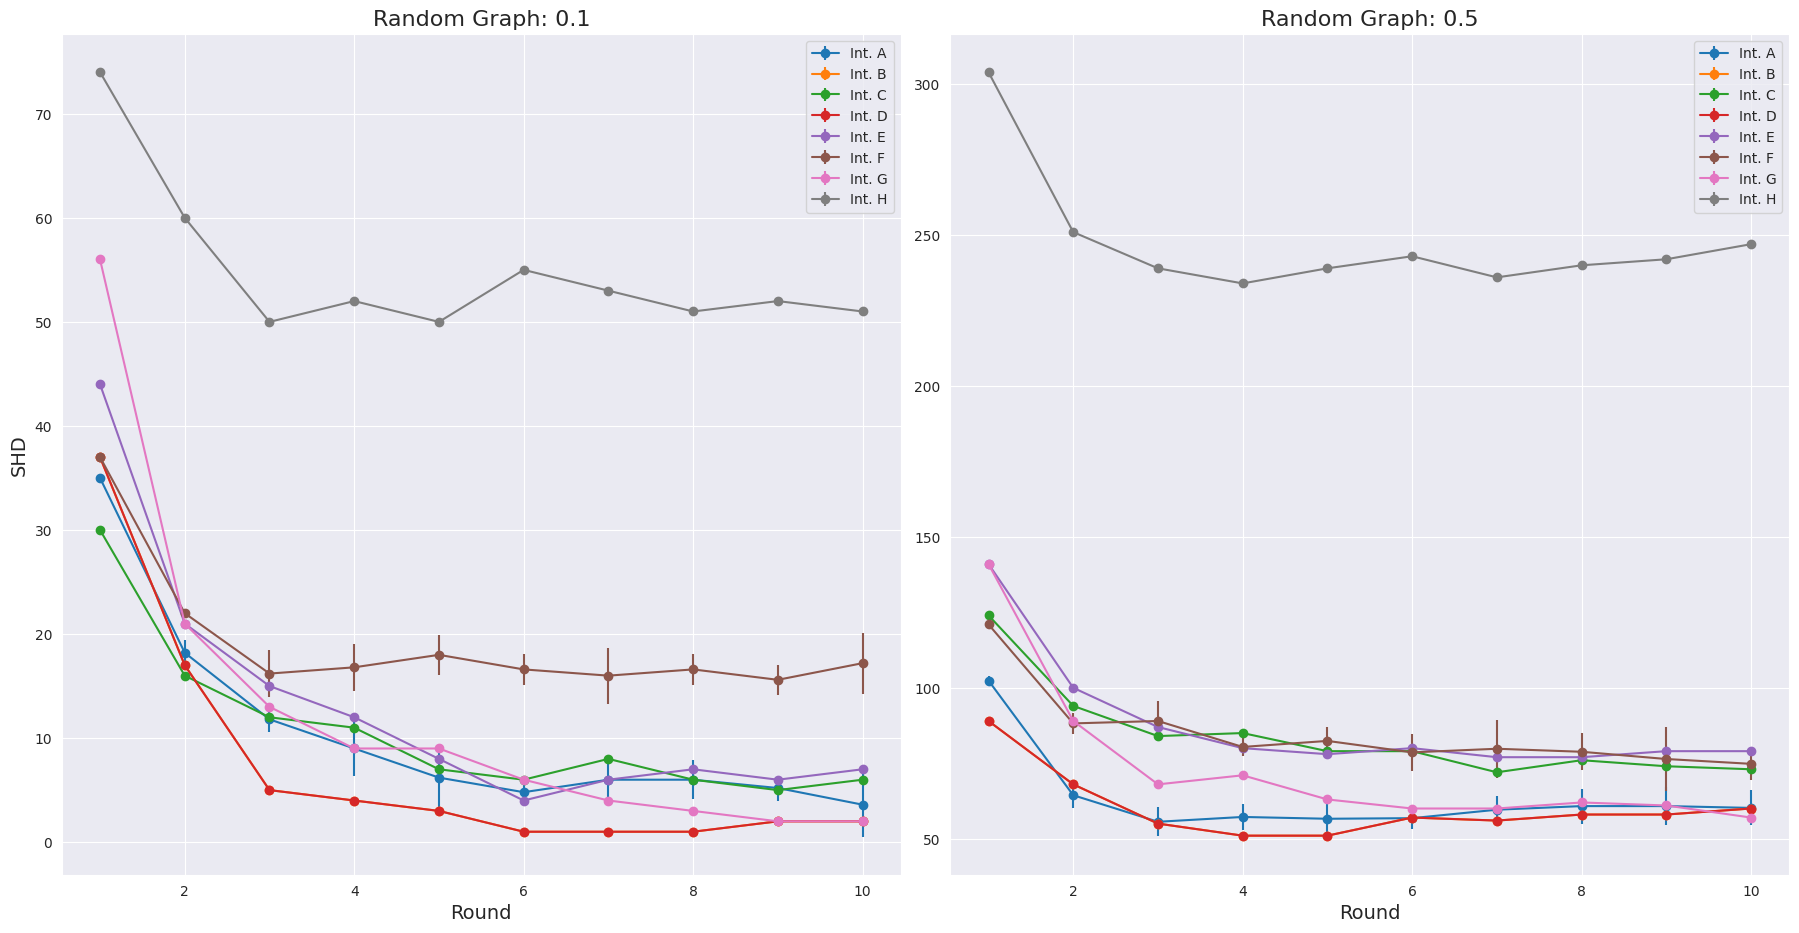

In [10]:
"""
We get a folder structure like this after running the experiments.

GraphAsym-0.2-50/
"""

# Experiments
num_experiments = 8
repeat_count = 5
num_of_rounds = 10

# Graphs
edge_probs =  [0.1, 0.5]
num_vars = 50

# Dataset size
num_clients = 5
intervention_models = ["A", "B", "C", "D", "E", "F", "G", "H"]

# Miscellaneous
plot_metric = "SHD"
std_exageration =  3
parent_folder_name = "int_asym_rnd"

def retrieve_client_info(stored_results_dict, metric=plot_metric) -> np.ndarray:
    return np.asarray([client_dict[metric] for client_dict in stored_results_dict['priors']])

rounds = np.arange(start=1, stop=num_of_rounds + 1, step=1)

n_row = 1
n_col = len(edge_probs)

sns.set_style('darkgrid')

fig, axs = plt.subplots(n_row, n_col, figsize=(18, 9), dpi=100)
fig.tight_layout(h_pad=2, w_pad=0.5)

for idx, edge_prob in enumerate(edge_probs):
    ax_col = idx % 4
    axs[ax_col].set_title(f'Random Graph: {edge_prob}', fontsize=16)
    folder_name = f'GraphAsym-{edge_prob}-{num_vars}'

    for experiment_id in range(num_experiments):
        metrics = list()

        for rep_idx in range(repeat_count):
            data_file_name = f'results_{experiment_id}_{rep_idx}.pickle'
            load_dir = os.path.join(os.pardir, 'data', parent_folder_name, folder_name, data_file_name)

            with open(load_dir, 'rb') as handle:
                results_dict = pickle.load(handle)

            metrics.append(retrieve_client_info(results_dict))

        metrics_avg = np.mean(np.asarray(metrics), axis=0)
        metrics_std = np.std(np.asarray(metrics), axis=0)

        lab = f'Int. {intervention_models[experiment_id]}'


        axs[ax_col].errorbar(rounds, metrics_avg, std_exageration * metrics_std, label=lab,
                                     linestyle='solid', marker='o')
        axs[ax_col].legend(loc='upper right')

    for r in range(n_row):
        axs[0].set_ylabel(plot_metric, fontsize=14)


    for c in range(n_col):
        axs[c].set_xlabel('Round', fontsize=14)

plt.savefig(f'int-asym-c{num_clients}-v{num_vars}-ep{edge_probs}.png', bbox_inches='tight')
plt.show()